# Companion to the chapter 9 of LA4DS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from latools import projection, second_projection, enorm, matrix
import math

In [2]:
A = 1/2**0.5 * np.array([[1, 1], [-1, 1]])

(-2.0, 2.0, -2.0, 2.0)

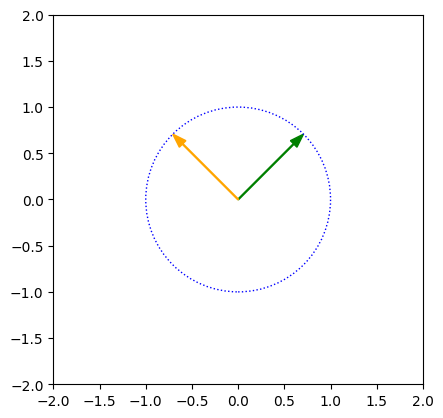

In [3]:
plt.arrow(0,0, *A[0], color = 'green', length_includes_head=True, width=0.01, head_width=0.1)
plt.arrow(0,0, *A[1], color = 'orange', length_includes_head=True, width=0.01, head_width=0.1)
circle1 = plt.Circle((0, 0), 1, color='b', fill=False, linestyle=':', linewidth=1)
plt.gca().add_patch(circle1)

plt.axis('square')
plt.axis([-2,2,-2,2])

Let's try ortogonalization

In [4]:
B = np.random.randint(-5, 5, (2,2))
B

array([[-1, -3],
       [-1, -5]])

In [5]:
# First column
q_0 = enorm(B[:, 0], 1)
q_0

array([-0.70710678, -0.70710678])

In [6]:
help(second_projection)

Help on function second_projection in module latools:

second_projection(projected, base)
    Calculates the projection ortogonal to the base



In [7]:
# Second column
q_1 = enorm(second_projection(B[:,1], q_0), 1)
q_1

array([ 0.70710678, -0.70710678])

In [8]:
Q = np.array([q_0, q_1])
Q

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

(-3.185355339059327,
 2.3185337482371984,
 -5.250176776695296,
 0.25371231060122934)

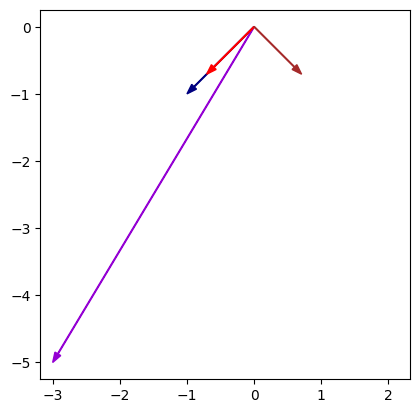

In [9]:
plt.arrow(0,0, *B[:, 0], color='navy', width=0.01,length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *B[:, 1], color='darkviolet', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *q_0, color='r', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *q_1, color='brown', width=0.01, length_includes_head=True, head_width=0.1)

plt.axis([-6, 6, -6, 6])
plt.axis('square')

In [12]:
# Let us see that QtQ is E

np.round(Q.T @ Q, 5)

array([[ 1., -0.],
       [-0.,  1.]])

In [13]:
# Now let-s find a QR ortogonalization

# B = QR
# QtB = QtQR
# QtB = R

R = np.round(Q.T @ B, 5)
R

array([[ 0.     , -1.41421],
       [ 1.41421,  5.65685]])

In [14]:
np.round(Q @ R, 5) == B #> True

array([[ True,  True],
       [ True, False]])

Comparing with np realization

In [15]:
Q,R

(array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]),
 array([[ 0.     , -1.41421],
        [ 1.41421,  5.65685]]))

In [16]:
np.linalg.qr(B)

QRResult(Q=array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]]), R=array([[ 1.41421356,  5.65685425],
       [ 0.        , -1.41421356]]))

# Exercises

## Exercise 9.1

Illustrate that

$$ Q^TQ = QQ^T = Q^{-1}Q = QQ^{-1} = E $$

Well, the first two are obvious due to the fact that Q^T is an inverse matrix of Q. 
And the last two are true for any invertible matrix. 

Let us however prove that Q^t is an inverse of Q;

Consider $$ K = Q^TQ$$

The i,j element of K equals to

$$k_{i,j} = q'_i * \hat{q_j} $$

where q'_i is a row in Q^T and q_j is a column in Q, meaning that

$$ k_{i,j} = \hat{q_i} * \hat{q_j} <=> k_{i,j} = 0 (i\neq j) OR k_{i,j} = 1 (i=j) <=> K=E => Q^T = Q^{-1} $$

I hope that replaces illustaration with random matrices


## Exercise 9.2

GS-ortogonalization

Well the majority of GS-procedure was made in the first part, but only for the 2x2 matrix; let's do the case for matrices of all sizes

In order to prove that we need to consider the following fact:

if c - vector, a and b - two projections on some plane, a.b = 0 ('.' denotes dot product);

d = c - (a+b) perpendicular to that plane
_____________________________________
1)
let's prove that c - (a+b) is perpendicular to a

Consider a.(c - (a+b)) 

a.(c - (a+b)) = a.c - a.(a+b) = a.c - a.a - a.b = (1);

a.b equals zero, hence

(1) = a.c - a.a = a.(c-a) = 0, because c-a is perpendicular to a (a is projection);

2) 
The same logic naturally applies to b; since d is perpendicular to two vectors of a plane, it means that d perpendicular to the plane, q.e.d

HOWEVER, it is not enough for the proof for any number of vectors; I might need to revisit it later


In [19]:
def gs_q(X):
    Q = []
    Q.append(enorm(X[:,0],1))
    for i in range(1, X.shape[1]):
        p = np.sum([projection(X[:,i], q) for q in Q], axis=0) # sum of projections
        q = X[:,i] - p # obtaining perpendicular
        q = enorm (q,1) # normalizing vector
        Q.append(q)
    return np.column_stack(Q) # creates column matrix

In [23]:
# Test

G = matrix(5)
G

array([[  3,  -6,  -1,   2,   8],
       [  6,  -3,   7,   0,   6],
       [  8,   8,  -7,  -3,  -8],
       [ -4,   3,   2, -10,   1],
       [ -1,  -2,  -7,  -6, -10]])

In [24]:
Q = gs_q(G)
Q

array([[ 0.26726124, -0.58824786, -0.27897388, -0.11981727,  0.7002523 ],
       [ 0.53452248, -0.35294872,  0.55238298, -0.4031084 , -0.3494132 ],
       [ 0.71269665,  0.62746438, -0.27004923, -0.08905184,  0.13226912],
       [-0.35634832,  0.32680437,  0.25251493, -0.745168  ,  0.38363478],
       [-0.08908708, -0.16993827, -0.69307737, -0.50984494, -0.47210843]])

In [25]:
q,_ = np.linalg.qr(G)
q

array([[-0.26726124, -0.58824786,  0.27897388, -0.11981727, -0.7002523 ],
       [-0.53452248, -0.35294872, -0.55238298, -0.4031084 ,  0.3494132 ],
       [-0.71269665,  0.62746438,  0.27004923, -0.08905184, -0.13226912],
       [ 0.35634832,  0.32680437, -0.25251493, -0.745168  , -0.38363478],
       [ 0.08908708, -0.16993827,  0.69307737, -0.50984494,  0.47210843]])

In [29]:
np.round(q + Q)

array([[ 0., -1., -0., -0.,  0.],
       [ 0., -1., -0., -1.,  0.],
       [ 0.,  1.,  0., -0.,  0.],
       [-0.,  1.,  0., -1.,  0.],
       [-0., -0.,  0., -1.,  0.]])

In [28]:
np.round(q - Q)

array([[-1.,  0.,  1., -0., -1.],
       [-1., -0., -1.,  0.,  1.],
       [-1.,  0.,  1.,  0., -0.],
       [ 1.,  0., -1.,  0., -1.],
       [ 0.,  0.,  1.,  0.,  1.]])

In order to understand why we consider q+Q and q-Q, I address to Mike X Cohen's book

## Exercise 9.3